In [1]:
#get the data and print out
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


train_data = pd.read_csv("train.csv")
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


0    549
1    342
Name: Survived, dtype: int64


Text(0,0.5,'Numbers')

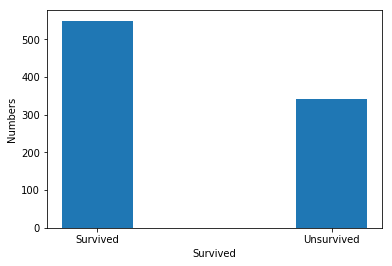

In [2]:
#show the Survived numbers
counts = train_data["Survived"].value_counts()
print(counts)
plt.bar(range(2),counts,0.3,align = 'center')
plt.xticks(range(2),("Survived","Unsurvived"))
plt.xlabel("Survived")
plt.ylabel("Numbers")

In [3]:
#handle the missing value
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#delete the Embarked missing rows 
train_data.drop(train_data[train_data['Embarked'].isnull()].index,inplace = True)

#delete the Cabin column
train_data.drop("Cabin",axis = 1,inplace = True)

#replce the non value with the average data
train_data['Age'].fillna(train_data["Age"].mean(),inplace = True)

#delete the useless column
train_data.drop(['PassengerId',"Name","Ticket"],axis = 1,inplace = True)

train_data.isnull().sum()



Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


Embarked     object
Survived    float64
dtype: object


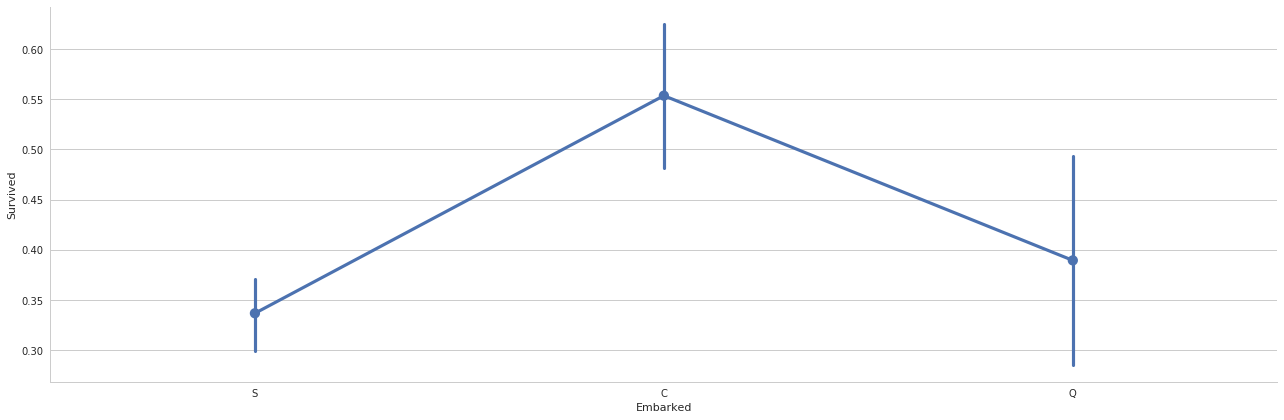

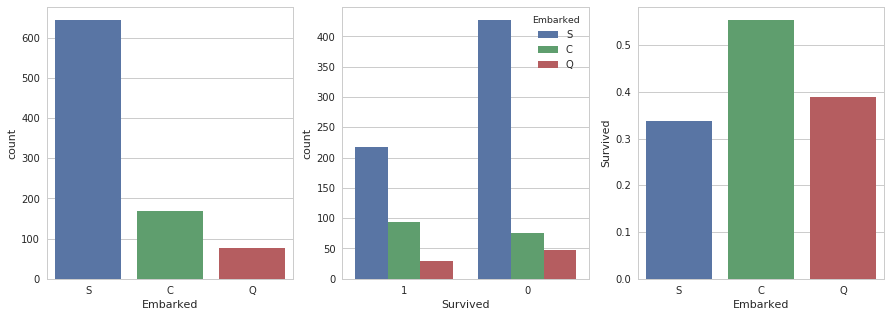

In [6]:
#visualize the dataset
sns.set(style = "whitegrid")
g = sns.factorplot(x = "Embarked", y = "Survived",size = 6,data = train_data,aspect = 3)

#extract the feature Embarked
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x = "Embarked",data = train_data,ax = ax1)
sns.countplot(x= "Survived",hue = "Embarked",data = train_data,ax= ax2,order=[1,0])
embark_perc = train_data[["Embarked", "Survived"]].groupby(['Embarked'],as_index = False).mean()
print(embark_perc.dtypes)
sns.barplot(x = "Embarked",y = "Survived",data = embark_perc,ax = ax3,order = ["S","C","Q"])



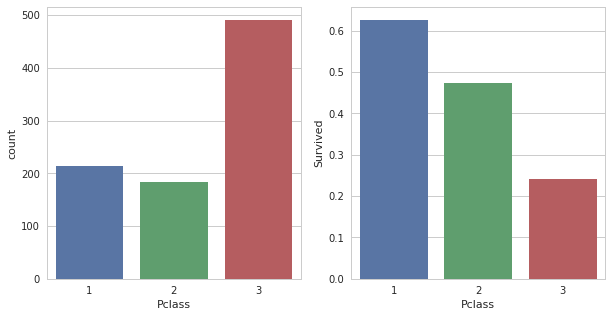

In [7]:
#Pclass

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x = "Pclass",data = train_data, ax = ax1)
Pclass_mean = train_data[["Pclass","Survived"]].groupby(["Pclass"],as_index = False).mean()
sns.barplot(x = "Pclass", y = "Survived",data = Pclass_mean,ax = ax2)

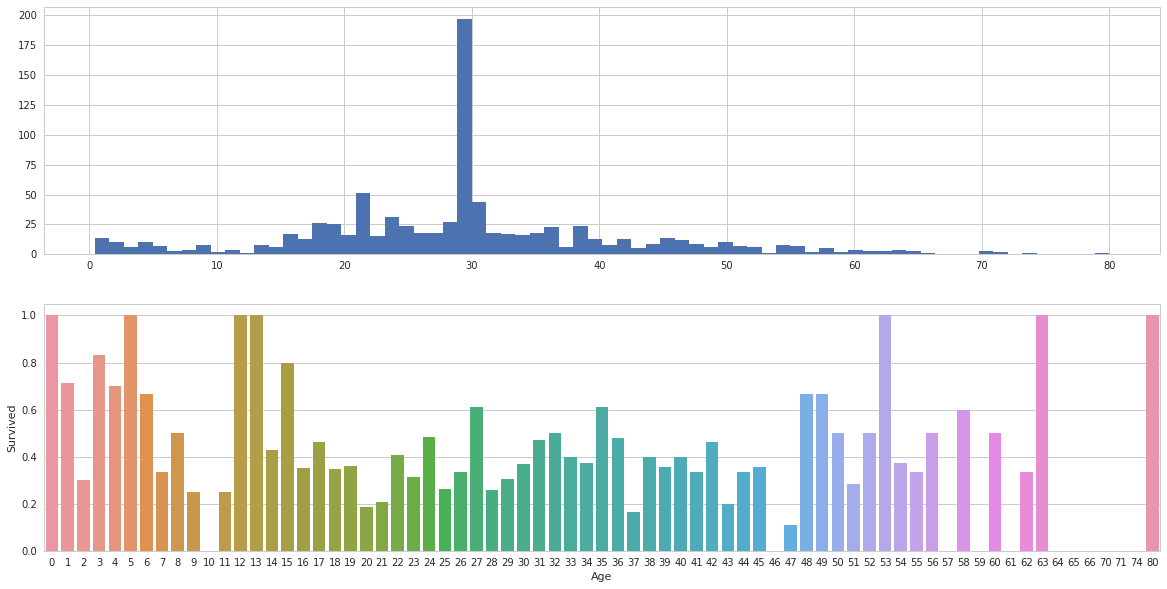

In [8]:
#Age
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(20,10))
train_data["Age"].hist(bins = 70,ax = ax1)
train_data["Age"] = train_data["Age"].astype(int)

age_mean = train_data[["Age","Survived"]].groupby(["Age"],as_index = False).mean()
sns.barplot(x = "Age", y ="Survived", data = age_mean,ax = ax2)

In [9]:
#prepare  train the data
#show the data types
train_data.dtypes

#convert the data type
train_data["Fare"] = train_data["Fare"].astype(int)
train_data_sex = pd.get_dummies(train_data["Sex"])
train_data_sex.columns = ['Feamel','Male']
#print(train_data_sex)
train_data_embark = pd.get_dummies(train_data["Embarked"])
train_data_embark.columns= ['S','C','Q']
#print(train_data_embark)
train_data_Pclass = pd.get_dummies(train_data["Pclass"])
train_data_Pclass.columns = ['Class1','Class2','Class3']
train_data = train_data.join([train_data_sex,train_data_embark,train_data_Pclass])
train_data.head(5)
train_data.drop(['Pclass','Sex','Embarked'],axis = 1,inplace = True)
y_train = train_data["Survived"]
train_data.drop(['Survived'],axis = 1,inplace = True)

In [10]:
#prepare the test data
test_data = pd.read_csv('test.csv')
test_data.head(5)
test_data.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1,inplace = True)
test_data.head(5)


test_data["Fare"].fillna(test_data['Fare'].median(),inplace = True)
test_data["Age"].fillna(test_data['Age'].mean(),inplace = True)
test_data.isnull().sum()

#convert the data type
test_data["Fare"] = test_data["Fare"].astype(int)
test_data_sex = pd.get_dummies(test_data["Sex"])
test_data_sex.columns = ['Feamel','Male']
#print(train_data_sex)
test_data_embark = pd.get_dummies(test_data["Embarked"])
test_data_embark.columns= ['S','C','Q']
#print(train_data_embark)
test_data_Pclass = pd.get_dummies(test_data["Pclass"])
test_data_Pclass.columns = ['Class1','Class2','Class3']
test_data = test_data.join([test_data_sex,test_data_embark,test_data_Pclass])
test_data.head(5)
test_data.drop(['Pclass','Sex','Embarked'],axis = 1,inplace = True)

test_data.head(5)

,Age,SibSp,Parch,Fare,Feamel,Male,S,C,Q,Class1,Class2,Class3
0,34.5,0,0,7,0,1,0,1,0,0,0,1
1,47.0,1,0,7,1,0,0,0,1,0,0,1
2,62.0,0,0,9,0,1,0,1,0,0,1,0
3,27.0,0,0,8,0,1,0,0,1,0,0,1
4,22.0,1,1,12,1,0,0,0,1,0,0,1


In [11]:
#train the data
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

#logistic function
logreg = LogisticRegression(max_iter = 1000)
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)
logreg.fit(train_data,y_train)
y_pred = logreg.predict(test_data)
logreg.score(train_data,y_train)



0.80427446569178851

In [22]:
#SVM
svc= SVC(kernel ='rbf',degree = 3,max_iter = 1000)
svc.fit(train_data,y_train)
y_pred = svc.predict(test_data)
svc.score(train_data,y_train)

0.83802024746906634

In [13]:
#KNN
#knn = KNeighborsClassifier(n_neighbors = 3)
#knn.fit(train_data, y_train)
#y_pred = knn.predict(test_data)
#knn.score(train_data, y_train)

In [23]:

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(train_data, y_train)
y_pred = random_forest.predict(test_data)

random_forest.score(train_data, y_train)

0.96062992125984248

In [24]:
#submission
test_data = pd.read_csv('test.csv')
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": y_pred
    })
submission.to_csv('titanic.csv', index=False)